In [2]:
import pandas as pd
import numpy as np
import math
import statistics
from scipy import stats
import matplotlib.pyplot as plt

In [89]:
survey_df = pd.read_csv("CSCI_Fall_2024_survey.csv")
survey_df.head(10)

,Timestamp,What is your name?,What are your pronouns?,What state/country were you born in?,How many siblings do you have?,How much experience do you have programming?,What class are you in?,Are you working while in school?,How many pets and of which kind do you have?,What is your favorite type of food?,Where do you live?,Do you take the metro?,What is your major?,How old are you?,What is your favorite TV show?,What is your favorite video game?,What is your favorite book?,Why are you taking this class?,Whats your favorite bash command?
0,2024/09/05 6:10:09 PM EST,Alex,He/Him,Mexico,1,1-2 years,Freshman,No,"1, Dog",Japanese,Off campus,No,Computer Science,18,Friends,Persona Series,Anything about mythology,My major,cd and ls
1,2024/09/05 6:33:51 PM EST,Tanay,He/Him,Missouri,1,0-3 months,Freshman,No,0,Mexican,On campus,No,CS/Business,18,Suits,Super Smash bros,Percy Jackson,To get a deeper understanding and basics of cs,ls
2,2024/09/05 6:34:21 PM EST,Akshita,She/Her,"Frankfurt, Germany",1,0-3 months,Freshman,No,no pets!,Italian,On campus,No,Data Science,18,How I Met Your Mother,Mario Kart,Harry Potter,To learn programming for my major!,git commit
3,2024/09/05 6:35:03 PM EST,Anthony,He/Him,Wisconsin,1,0-3 months,Senior,Yes,I have two dogs and they are both at home,Italian,Off campus,No,Business Economics,21,Breaking Bad,Call of Duty,NaN,Programming has always been an interest of mine,ls
4,2024/09/05 6:35:56 PM EST,Nuri,He/Him,"st. louis, mo",2,1-2 years,Freshman,No,0,American,On campus,No,computer science,18,Hunter x Hunter,valorant,berserk,interested in having a career in data,ls
5,2024/09/05 6:35:57 PM EST,Mahley,She/Her,Missouri,1,0-3 months,Freshman,No,0,Japanese,On campus,No,Computer Science,18,The Office,until dawn,I don't read books,to become a software engineer,print
6,2024/09/05 6:36:02 PM EST,Chetan,He/Him,India,1,0-3 months,Freshman,No,none,Indian,On campus,No,cs/ finance,18,all of us are dead,minecraft,harry potter,its for my major,i dont know what that is
7,2024/09/05 6:36:13 PM EST,Steven,He/Him,St. Louis MO,1,6 months - 1 year,Freshman,Yes,NaN,Mexican,Off campus,No,Computer Science,18,X-Men 97,Devil Survivor 2 Overclocked,Series of Unfortunate Events - Reptile Room,To learn the basics of Coding since I only rea...,ls
8,2024/09/05 6:36:14 PM EST,Nico,multiple: he/him and they/them,"Missouri, USA",2,0-3 months,Freshman,Yes,1 dog and 1 cat,Chinese,On campus,Yes,Computer Science; considering an additional ma...,18,It's Always Sunny In Philadelphia,Pikmin,Percy Jackson,It's required for my major + I know nothing ab...,cd
9,2024/09/05 6:36:24 PM EST,Iovane,He/Him,Georgia (the country not the state),4,0-3 months,Freshman,Yes,"2 cats, one dog",Mexican,Off campus,No,Data Science,19,GOT,Minecraft,1984,Major Requirement,cd


In [90]:
survey_df.columns

Index(['Timestamp', 'What is your name?', 'What are your pronouns?',
       'What state/country were you born in?',
       'How many siblings do you have?',
       'How much experience do you have programming?',
       'What class are you in? ', 'Are you working while in school?',
       'How many pets and of which kind do you have?',
       'What is your favorite type of food?', 'Where do you live?',
       'Do you take the metro?', 'What is your major?', 'How old are you?',
       'What is your favorite TV show?', 'What is your favorite video game?',
       'What is your favorite book?', 'Why are you taking this class? ',
       'Whats your favorite bash command?'],
      dtype='object')

In [8]:
survey_df['What state/country were you born in?'].value_counts()

What state/country were you born in?
Missouri                               5
St. Louis MO                           2
Mexico                                 1
Wisconsin                              1
Frankfurt, Germany                     1
st. louis, mo                          1
India                                  1
Missouri, USA                          1
Georgia (the country not the state)    1
New Jersey                             1
st.louis mo                            1
Saint Louis, Missouri                  1
Kansas, Overland Park                  1
United States Missouri                 1
Oklahoma                               1
I was born in Chandigarh, India!       1
People's Republic of China             1
india                                  1
Cameroon                               1
TEXAS                                  1
Kazakhstah                             1
Name: count, dtype: int64

In [102]:
survey_df["Origin"]=np.where(survey_df['What state/country were you born in?']=="Mexico","Mexico",
                                np.where(survey_df['What state/country were you born in?']=="Wisconsin","Wisconsin",
                                np.where(survey_df['What state/country were you born in?']=="Georgia (the country not the state)","Georgia the country",
                                np.where(survey_df['What state/country were you born in?']=="TEXAS","Texas",
                                np.where(survey_df['What state/country were you born in?']=="New Jersey","New Jersey",
                                np.where(survey_df['What state/country were you born in?']=="Frankfurt, Germany","Germany",
                                np.where(survey_df['What state/country were you born in?']=="I was born in Chandigarh, India!","India",
                                np.where(survey_df['What state/country were you born in?']=="india","India",
                                np.where(survey_df['What state/country were you born in?']=="Kansas, Overland Park","Kansas",
                                np.where(survey_df['What state/country were you born in?']=="Oklahoma","Oklahoma",
                                np.where(survey_df['What state/country were you born in?']=="People's Republic of China","China",
                                np.where(survey_df['What state/country were you born in?']=="Cameroon","Cameroon",
                                np.where(survey_df['What state/country were you born in?']=="Kazakhstah","Kazakhstah",
                                np.where(survey_df['What state/country were you born in?']=="India ","India",
                                "Missouri"))))))))))))))

In [103]:
survey_df['Origin'].value_counts()

Origin
Missouri               12
India                   3
Mexico                  1
Germany                 1
Wisconsin               1
Georgia the country     1
New Jersey              1
Kansas                  1
Oklahoma                1
China                   1
Cameroon                1
Texas                   1
Kazakhstah              1
Name: count, dtype: int64

In [104]:
survey_df['How many pets and of which kind do you have?'].value_counts()

How many pets and of which kind do you have?
0                                                                                                      7
1, Dog                                                                                                 1
no pets!                                                                                               1
I have two dogs and they are both at home                                                              1
none                                                                                                   1
1 dog and 1 cat                                                                                        1
2 cats, one dog                                                                                        1
I have two dogs. They're bernedoodles.                                                                 1
1                                                                                                      1
2, Grumpy 

In [105]:
survey_df['Pets']=np.where(survey_df['How many pets and of which kind do you have?']=="1, Dog","1 dog",
                        np.where(survey_df['How many pets and of which kind do you have?']=="I have two dogs and they are both at home","2 dogs",
                        np.where(survey_df['How many pets and of which kind do you have?']=="1 dog and 1 cat","1 dog 1 cat",
                        np.where(survey_df['How many pets and of which kind do you have?']=="2 cats, one dog","1 dog 2 cats",
                        np.where(survey_df['How many pets and of which kind do you have?']=="I have two dogs. They're bernedoodles.","2 dogs",
                        np.where(survey_df['How many pets and of which kind do you have?']=="1","1 unspecified pet",
                        np.where(survey_df['How many pets and of which kind do you have?']=="2, Grumpy the exotic shorthair w heterchromia and my dog Furball is a rescue but he is just as cute","1 dog 1 cat",
                        np.where(survey_df['How many pets and of which kind do you have?']=="2 minature schnauzers","2 dogs",
                        np.where(survey_df['How many pets and of which kind do you have?']=="2 dogs","2 dogs",
                        np.where(survey_df['How many pets and of which kind do you have?']=="2, dogs.","2 dogs",
                        np.where(survey_df['How many pets and of which kind do you have?']=="1 Cat; 6 Dogs (Over two households)","6 dogs 1 cat",
                        np.where(survey_df['How many pets and of which kind do you have?']=="three dogs","3 dogs",
                        "no pets"))))))))))))
survey_df['Pets'].value_counts()

Pets
no pets              14
2 dogs                5
1 dog 1 cat           2
1 dog                 1
1 dog 2 cats          1
1 unspecified pet     1
6 dogs 1 cat          1
3 dogs                1
Name: count, dtype: int64

In [106]:
survey_df['What is your favorite type of food?'].value_counts()

What is your favorite type of food?
Italian             6
Japanese            5
Mexican             5
American            3
Indian              3
Chinese             2
all of the above    1
korean              1
Name: count, dtype: int64

In [107]:
survey_df['What is your major?'].value_counts()

What is your major?
Computer Science                                                                                                 10
Data Science                                                                                                      3
CS/Business                                                                                                       1
Business Economics                                                                                                1
computer science                                                                                                  1
cs/ finance                                                                                                       1
Computer Science; considering an additional major or a minor                                                      1
comp sci                                                                                                          1
Biology w/ evolutionary bio minor                   

In [108]:
survey_df['Majors']=np.where(survey_df['What is your major?']=="Data Science","Data Science",
                            np.where(survey_df['What is your major?']=="Data science","Data Science",
                            np.where(survey_df['What is your major?']=="CS/Business","CS/Business",
                            np.where(survey_df['What is your major?']=="Business Economics","Business Economics",
                            np.where(survey_df['What is your major?']=="cs/ finance ","CS/Finance",
                            np.where(survey_df['What is your major?']=="Biology w/ evolutionary bio minor","Biology",
                            np.where(survey_df['What is your major?']=="TBD","Undecided",
                            np.where(survey_df['What is your major?']=="Economics","Economics",
                                     "Computer Science"))))))))
survey_df['Majors'].value_counts()

Majors
Computer Science      17
Data Science           4
CS/Business            1
Business Economics     1
CS/Finance             1
Biology                1
Undecided              1
Name: count, dtype: int64

In [109]:
survey_df['How old are you?'].value_counts()

How old are you?
18    18
19     4
21     2
20     1
17     1
Name: count, dtype: int64

In [110]:
survey_df['Ages']=survey_df['How old are you?']

Text(0.5, 1.0, 'Histogram of Class Origins')

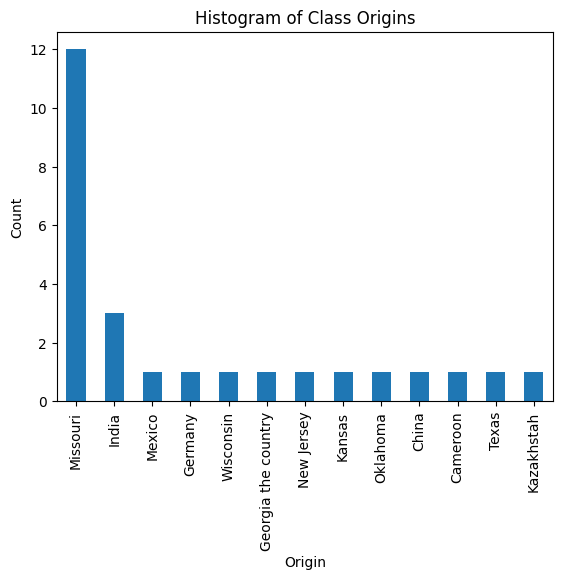

In [124]:
Origins= survey_df["Origin"].value_counts()
Origins.plot(kind="bar")
plt.xlabel('Origin')
plt.ylabel('Count')
plt.title('Histogram of Class Origins')

In [ ]:
# The bar graph shows the number of people in the class from each State or COuntry represented

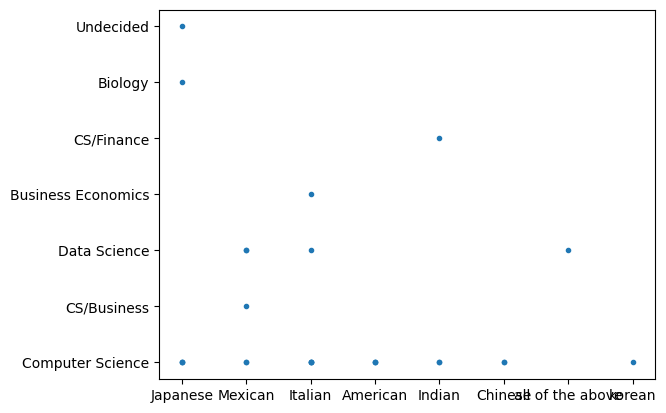

In [130]:
plt.plot(survey_df["What is your favorite type of food?"],survey_df["Majors"],'.')

In [ ]:
# this scatter plot shows favorite foods by Major

<Axes: ylabel='Timestamp'>

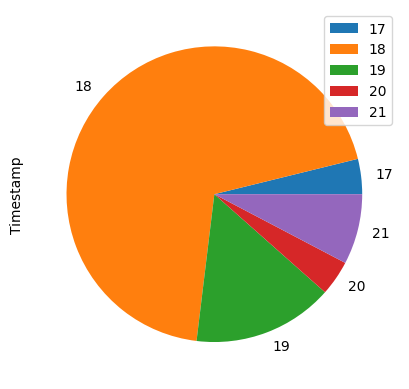

In [123]:
agg_ages = survey_df.groupby("Ages").count()
agg_ages.plot(kind="pie", y = 'Timestamp')

In [ ]:
# this pie chart shows the distribution of ages in the class

<Axes: ylabel='Timestamp'>

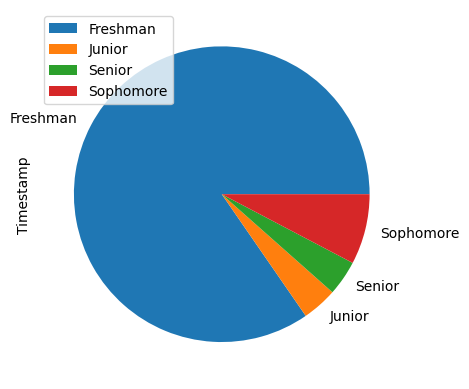

In [133]:
agg_class = survey_df.groupby("What class are you in? ").count()
agg_class.plot(kind="pie", y = 'Timestamp')

In [ ]:
# this graph shows the distribution of class levels in our class

Text(0.5, 1.0, 'Histogram of Class Pets')

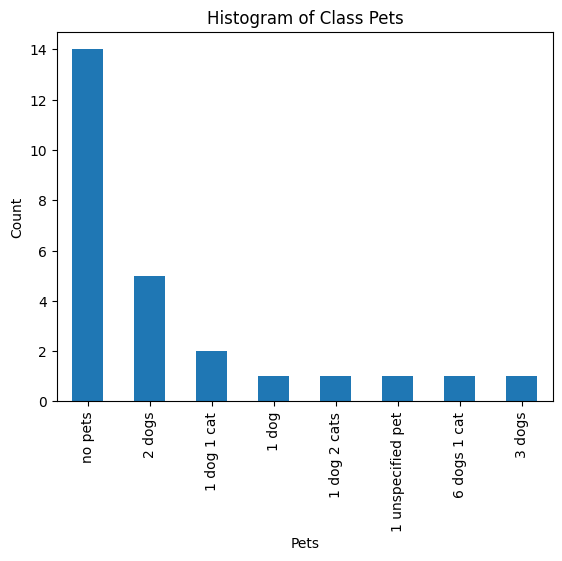

In [134]:
pet_count= survey_df["Pets"].value_counts()
pet_count.plot(kind="bar")
plt.xlabel('Pets')
plt.ylabel('Count')
plt.title('Histogram of Class Pets')

In [ ]:
# this histogram shows the number of pets the class has